## Data, Analytics &amp; AI 
# <font color=indigo> Using Python &amp; Excel Together </font>


---

<small>QA Ltd. owns the copyright and other intellectual property rights of this material and asserts its moral rights as the author. All rights reserved.</small>

## Contents
1. Library Overview
2. Opening existing excel files
3. Create new excel files
4. Edit existing excel files
5. Simple CLI for excel
6. Automate excel file processing
7. Python vs. Excel
8. Direct Excel manipulation with OpenPyXl

## Prerequisites

### Libraries

We are now familiar with Pandas, Python's counterpart to Excel.

In [33]:
import pandas as pd

### openpyxl vs. xlwings

`openpyxl` is a Python library that provides methods to **read** from, **write** to, run **arithmetic operations** in, & **plot graphs** in *Excel files* using Python.

It works directly on excel ".xlsx" files, which are essentially a zip-file containing multiple XML files that are formatted according to Microsoft's OOXML specification.

This means you can actually work with Excel files without having Excel on your computer. This is a fast way of working with xlsx files & is especially useful if you want to pull data from a large number of them. 

It has its drawbacks when formulae are implemented & the results need to be read - the file has to have been opened using excel for values to be computed.

`xlwings` makes use of the fact that Microsoft Excel can be started and controlled by an external program if it uses the right code. This means that python script with the right commands can fully control an Excel Application (open excel files, query data from cells, write data to cells, save excel files, etc.). When `xlwings` runs, you will actually see the Microsoft Excel application start up. Then, `xlwings` tells Excel what to do and Excel does it.

This is slower when many files need to be iterated over, but it is useful if you want Excel to do some calculation. It also means that any live-updated data will actually be in its most recent state when it is used.

They are unlikely to be installed by default. By running the below code, you will install it in your current conda environment.

*Aside: `!` is a metacommand which tells Jupyter to enter the code following it into the command line* 

In [2]:
# Needed if openpyxl not installed
# !pip install openpyxl
# !pip install xlwings

### Data

The data file we are going to be using is called `rates.xlsx` & should be in the `courseware\data` folder.

Rates contains 1 year of exchange rates between GBP and 3 other currencies: EUR, USD, and ROM.

## Reading `.xlsx` files into pandas DataFrames

### Overview of read_excel()

Initially, we'll  use `pandas` to read Excel files. Then we'll look at manual interaction with `openpyxl` later.

Pandas has a function called `read_excel` which uses `openpyxl` to open an `xlsx` file.

The only argument that we *have* to specify when calling the function is `io`. This is a reference to the file you wish to open, commonly given as a filepath.

We'll be using filepaths, but we could also use an existing Excel file object.

Some of the key optional arguments we can specify include:
* sheet_name: allows you to select the sheet(s) from an Excel file you want to load
* header: which sheet row contains column headers of the table
* names: set column names manually
* usecols: select specific columns to load
* na_values: specify which data values should be represented as missing (NaN)

The function returns a dictionary of dataframes if multiple sheets are being loaded, or a single dataframe if just one sheet.

*Reference: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_excel.html*

### Load main sheet

A simple one liner is enough to load in the main sheet of the `rates.xlsx` file.

In [3]:
df_rates = pd.read_excel('datasets/rates.xlsx')
print(f"data structure that we have read in: {type(df_rates)}")
print(f"df has columns: {df_rates.columns}")

data structure that we have read in: <class 'pandas.core.frame.DataFrame'>
df has columns: Index(['Date', 'EUR', 'USD', 'RON'], dtype='object')


In [4]:
df_rates

,Date,EUR,USD,RON
0,2022-05-02,1.1932,1.2557,5.9036
1,2022-05-01,1.1918,1.2561,5.8968
2,2022-04-30,1.1918,1.2561,5.8968
3,2022-04-29,1.1918,1.2561,5.8968
4,2022-04-28,1.1855,1.2430,5.8659
...,...,...,...,...
361,2021-05-06,1.1533,1.3909,5.6816
362,2021-05-05,1.1591,1.3915,5.7110
363,2021-05-04,1.1525,1.3854,5.6788
364,2021-05-03,1.1516,1.3870,5.6737


### Load all sheets

In order to load all sheets of an Excel file, we simply set `sheet_name=None`. If there are multiple sheets, the result of the `read_excel` function is a dictionary, each key the name of the sheet, each value the Dataframe containing the data of that sheet.

In [7]:
dict_rates = pd.read_excel('datasets/rates.xlsx', sheet_name = None)
print("data structure that we have read in: ", type(dict_rates))
print("dictionary has keys: ", dict_rates.keys())

data structure that we have read in:  <class 'dict'>
dictionary has keys:  dict_keys(['excelrates', 'eur', 'usd', 'ron'])


We can extract each sheet by giving its name to the dictionary object.

In [8]:
excelrates = dict_rates["excelrates"]
eur = dict_rates["eur"]
usd = dict_rates["usd"]
ron = dict_rates["ron"]

eur # let's see what have we created

,Date,EUR
0,2022-05-02,1.1932
1,2022-05-01,1.1918
2,2022-04-30,1.1918
3,2022-04-29,1.1918
4,2022-04-28,1.1855
...,...,...
361,2021-05-06,1.1533
362,2021-05-05,1.1591
363,2021-05-04,1.1525
364,2021-05-03,1.1516


We can read in each sheet individually by specifying the sheet names. Note the mixed use of a numeric index & the explicit naming of the sheet.

In [10]:
excelrates = pd.read_excel('datasets/rates.xlsx', sheet_name = 0)
eur = pd.read_excel('datasets/rates.xlsx', sheet_name = 1)
usd = pd.read_excel('datasets/rates.xlsx', sheet_name = 2)
ron = pd.read_excel('datasets/rates.xlsx', sheet_name = "ron")

eur # let's see what have we created

,Date,EUR
0,2022-05-02,1.1932
1,2022-05-01,1.1918
2,2022-04-30,1.1918
3,2022-04-29,1.1918
4,2022-04-28,1.1855
...,...,...
361,2021-05-06,1.1533
362,2021-05-05,1.1591
363,2021-05-04,1.1525
364,2021-05-03,1.1516


## Writing pandas DataFrames to Excel spreadsheets 

Similar to reading, we have a simple command to write back to an excel sheet. It gets trickier when writing multiple sheets & we will have to use iteration to get it done.

### Write a single sheet

We'll start by writing a the df_rates dataframe to a single sheet.

In [11]:
df_rates

,Date,EUR,USD,RON
0,2022-05-02,1.1932,1.2557,5.9036
1,2022-05-01,1.1918,1.2561,5.8968
2,2022-04-30,1.1918,1.2561,5.8968
3,2022-04-29,1.1918,1.2561,5.8968
4,2022-04-28,1.1855,1.2430,5.8659
...,...,...,...,...
361,2021-05-06,1.1533,1.3909,5.6816
362,2021-05-05,1.1591,1.3915,5.7110
363,2021-05-04,1.1525,1.3854,5.6788
364,2021-05-03,1.1516,1.3870,5.6737


`to_excel` will create an xlsx file if none exists & write the DataFrame to it. The `.xlsx` part is essential, otherwise pandas gets confused.

In [12]:
df_rates.to_excel("new_rates.xlsx")

Now take a look at your file. It will be in the same place as your workbook. Without sheet names, none will be inferred. We name the sheet using `sheet_name`.

In [13]:
df_rates.to_excel("new_rates.xlsx",
                 sheet_name="main")

### Writing multiple sheets

There isn't built in functionality for writing a dictionary to an excel file. We get around this by making a connection to the excel file & writing data to it several times. To do this, we make use of an ExcelWriter object.

To demo this we're using the dict_rates dictionary.

In [14]:
with pd.ExcelWriter("many_rates.xlsx") as excel_file:
    for sheet, data in dict_rates.items():
        data.to_excel(excel_file, sheet_name=sheet)

This logic could easily be abstracted into a function for reuse.

In [15]:
def dict_to_excel(filename:str, dictonary:dict):
    with pd.ExcelWriter(filename) as excel_file:
        for sheet, data in dictionary.items():
            data.to_excel(excel_file, sheet_name=sheet)

## Edit Existing Excel Files

### Simple

Read in excel file to DataFrame

In [16]:
df_rates = pd.read_excel('datasets/rates.xlsx',
                         sheet_name="excelrates")

Insert new column, e.g. eur/gbp - ron/gbp differential

In [17]:
df_rates['eur_rom_diff'] = df_rates['EUR'] - df_rates['RON']

We've written to the file new_rates as it avoids corrupting the source sheet. This is just to make teaching easier.

In [19]:
df_rates.to_excel('datasets/new_rates.xlsx',
                  sheet_name="new_excelrates")

## Simple CLI for sheet loading

We have written a small module called `excel_loader.py` which uses user prompts to load sheets from an excel workbook.

To use it, we import the module & run the `get_sheet` function

In [23]:
import excel_loader

df = excel_loader.get_sheet()


Enter the name of the file you would like to read
         datasets/new_rates

Enter the sheet you want to load from the file
         new_excelrates


In [24]:
df

,Unnamed: 0,Date,EUR,USD,RON,eur_rom_diff
0,0,2022-05-02,1.1932,1.2557,5.9036,-4.7104
1,1,2022-05-01,1.1918,1.2561,5.8968,-4.7050
2,2,2022-04-30,1.1918,1.2561,5.8968,-4.7050
3,3,2022-04-29,1.1918,1.2561,5.8968,-4.7050
4,4,2022-04-28,1.1855,1.2430,5.8659,-4.6804
...,...,...,...,...,...,...
361,361,2021-05-06,1.1533,1.3909,5.6816,-4.5283
362,362,2021-05-05,1.1591,1.3915,5.7110,-4.5519
363,363,2021-05-04,1.1525,1.3854,5.6788,-4.5263
364,364,2021-05-03,1.1516,1.3870,5.6737,-4.5221


The module can also be run directly from the command line

In [25]:
#!python excel_loader.py rates new_excelrates

## Python Vs. Excel

If an Excel pro:
* Excel for genuinely new, possibly one-off analysis
* Python for routine, non-unique tasks on standard sources

If new to both, use whatever you are most comfortable with.

Simple data extraction can be very easily automated.

## Leveraging Python & with Excel

### Libraries

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

### Example Task: 30 day moving average exchange rate plot

Pandas DataFrames have lot's of functionalty we can leverage. Say we wanted to generate a 30-day moving average of an exchange rate. The `rolling` method makes this easy.

We're going to load in the Euro exchange rate data, calculate a moving average, plot it, and then load that plot back into Excel.

Let's start with `dict_rates`, a sheet we've loaded. We're only interested in the `EUR` table.

In [27]:
eur = dict_rates['eur']

We can directly use the `rolling` method to calculate rolling averages.

Let's construct a 7-day & a 30-day one & compare their appearance.

In [28]:
seven_day_rolling = eur.rolling(
    on="Date",
    window = 7,
    center=False
).mean()

thirty_day_rolling = eur.rolling(
    on="Date",
    window = 30,
    center=False
).mean()

In [29]:
seven_day_rolling

,Date,EUR
0,2022-05-02,NaN
1,2022-05-01,NaN
2,2022-04-30,NaN
3,2022-04-29,NaN
4,2022-04-28,NaN
...,...,...
361,2021-05-06,1.156757
362,2021-05-05,1.155843
363,2021-05-04,1.154400
364,2021-05-03,1.153171


### Store moving averages in the DataFrame

In [30]:
eur['SMA_30'] = thirty_day_rolling["EUR"]
eur['SMA_7'] = seven_day_rolling["EUR"]

In [31]:
eur.head(10)

,Date,EUR,SMA_30,SMA_7
0,2022-05-02,1.1932,NaN,NaN
1,2022-05-01,1.1918,NaN,NaN
2,2022-04-30,1.1918,NaN,NaN
3,2022-04-29,1.1918,NaN,NaN
4,2022-04-28,1.1855,NaN,NaN
5,2022-04-27,1.1874,NaN,NaN
6,2022-04-26,1.1886,NaN,1.190014
7,2022-04-25,1.1858,NaN,1.188957
8,2022-04-24,1.1915,NaN,1.188914
9,2022-04-23,1.1915,NaN,1.188871


### Visualising the Data

Matplotlib or seaborn allow us to quickly view the data

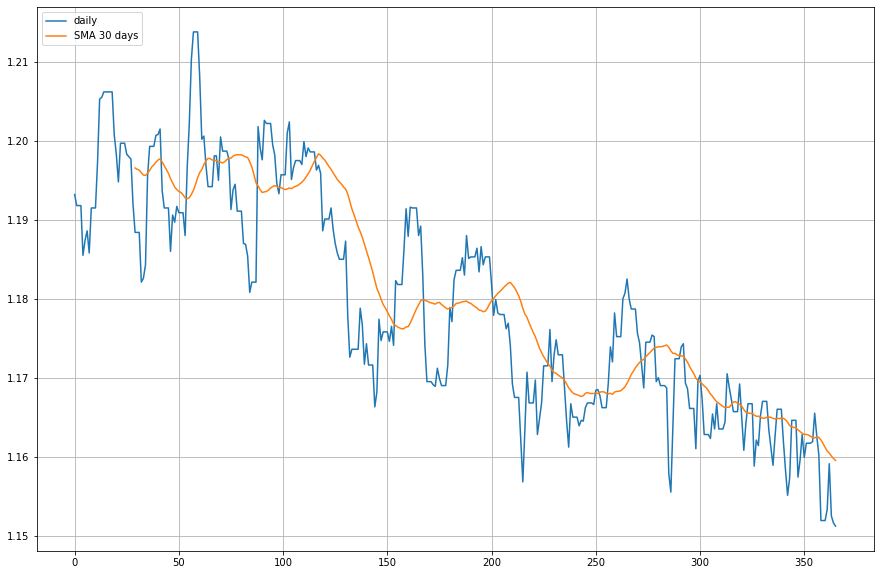

In [32]:
import matplotlib.pyplot as plt
plt.figure(figsize=[15,10])
plt.grid(True)
plt.plot(eur['EUR'],label='daily')
plt.plot(eur['SMA_30'],label='SMA 30 days')
plt.legend(loc=2)

### 7 day moving average

In [33]:
eur['SMA_7'] = eur.iloc[:,1].rolling(window=7).mean()

In [34]:
eur.head(10)

,Date,EUR,SMA_30,SMA_7
0,2022-05-02,1.1932,NaN,NaN
1,2022-05-01,1.1918,NaN,NaN
2,2022-04-30,1.1918,NaN,NaN
3,2022-04-29,1.1918,NaN,NaN
4,2022-04-28,1.1855,NaN,NaN
5,2022-04-27,1.1874,NaN,NaN
6,2022-04-26,1.1886,NaN,1.190014
7,2022-04-25,1.1858,NaN,1.188957
8,2022-04-24,1.1915,NaN,1.188914
9,2022-04-23,1.1915,NaN,1.188871


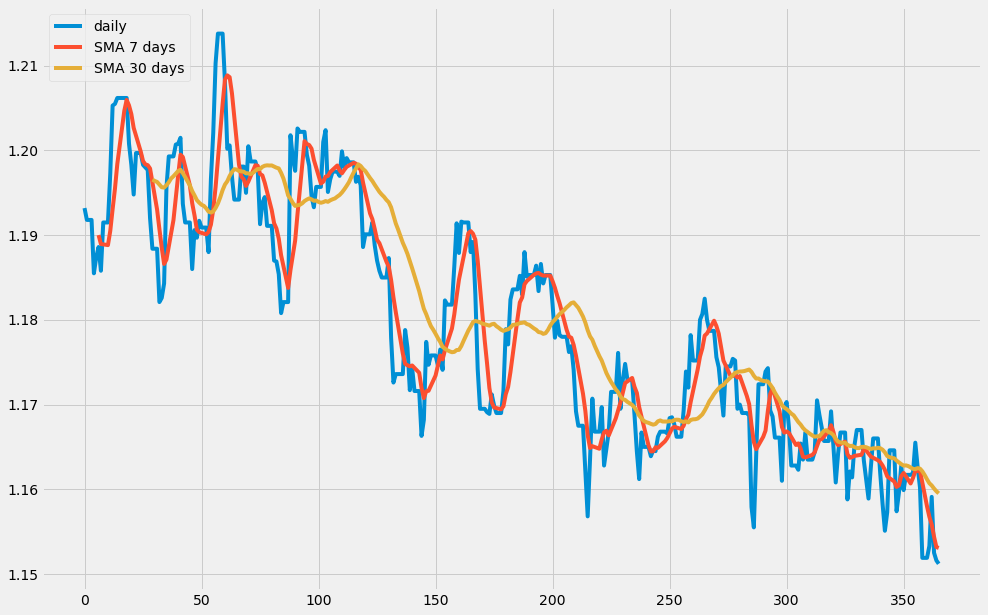

In [41]:
plt.style.use('fivethirtyeight') # Change plotting style
plt.figure(figsize=[15,10])
plt.grid(True)
plt.plot(eur['EUR'],label='daily')
plt.plot(eur['SMA_7'],label='SMA 7 days')
plt.plot(eur['SMA_30'],label='SMA 30 days')
plt.legend(loc=2)

plt.savefig("rolling_averages.png")

### Write the data

In [46]:
eur.to_excel('data_and_image.xlsx',
            sheet_name='rate_data')

### Load the image into Excel

In [37]:
import openpyxl

In [49]:
wb = openpyxl.load_workbook(filename = 'data_and_image.xlsx')

ws = wb.create_sheet("rate_plot")

In [50]:
img = openpyxl.drawing.image.Image('rolling_averages.png')
img.anchor = 'A1'
ws.add_image(img)
wb.save('data_and_image.xlsx')

#### pd special methods

"pandas has many optional dependencies that are only used for specific methods"
* ref: https://pandas.pydata.org/docs/getting_started/install.html#optional-dependencies

* pd.read_excel() is dependent on `openpyxl`

### Exercise
* Insert a 10 day rolling average, along with the data used to compute it, into a workbook called "10_day_average.xlsx"

## Manipulating Excel with Python

### `openpyxl`

A quick overview of of working with workbooks, sheets & cells.

In [53]:
import openpyxl

Say we wanted to create a new workbook. Within that workbook, we wanted to load in data regarding current GBP, EUR, and RON exchange rates to one sheet, add an image of a rolling average plot in another sheet, and set up an aggregate table in a final sheet.

OpenPyXL lets us do all of that.

First, we create a workbook object

In [51]:
wb_obj = openpyxl.Workbook() 

From the workbook object, we create an active sheet object.

In [52]:
sheet_obj = wb_obj.active

From the sheet object, we can go as far as to select & operate on individual cells.

In [53]:
cell_obj = sheet_obj.cell(row = 1, column = 1) 

A quick overview of of working with workbooks, sheets & cells.

You can think of the OpenPyXl representation of an Excel sheet as similar to a dictionary, but where the index is ordered.

*Aside: `.iter_rows()` is a method on a Worksheet object which

In [54]:
def print_rows(sheet):
    for row in sheet.iter_rows(values_only=True):
        print(row)

In [55]:
print_rows(sheet_obj)

(None,)


We can act on sheets as we've seen above.

In [56]:
sheet_obj["A1"] = "Data"

In [57]:
print_rows(sheet_obj)

('Data',)


In [58]:
sheet_obj["B1"] = 100

In [59]:
print_rows(sheet_obj)

('Data', 100)


In [60]:
wb_obj.save("my_data.xlsx")

### `xlwings`

In [3]:
!pip install xlwings

There are two main ways of working with xlwings - interactive mode & scripting mode.

Interactive mode is useful when you want to hook a jupyter notebook up to a spreadsheet, then read or write data computed in either Python or Excel.

Scripting mode is useful when you want to run a script which uses spreadsheets in the background - you will not see the "live" updating of the spreadsheet.

We start with interactive mode before digging deeper into scripting mode.

#### Interactive Mode

##### Setting up an active workbook

To set an active workbook, we create an xlwings `Book` object, specifying the location of the file.

Note: this will start an excel session.

In [18]:
import xlwings as xw

wb = xw.Book(r"datasets/rates_copy.xlsx")

#####  Simple Read/Write from Excel to Python & vice-versa

To read Excel data into a pandas DataFrame
, use the `load` function.

In [19]:
from xlwings import load

df = load()

In [20]:
df.drop(columns="RON",
       axis=1)

,EUR,USD
Date,,
2022-05-02,1.1932,1.2557
2022-05-01,1.1918,1.2561
2022-04-30,1.1918,1.2561
2022-04-29,1.1918,1.2561
2022-04-28,1.1855,1.2430
...,...,...
2021-05-06,1.1533,1.3909
2021-05-05,1.1591,1.3915
2021-05-04,1.1525,1.3854


To write Python or pandas/numpy data to an Excel file, starting in a particular cell, use the `view` function.

Without specifying the workbook, a new `.xlsx` file is created in the same directory as the notebook.

If a file/book object is specified, content can be written/overwritten

In [21]:
from xlwings import view

view(df)

In [22]:
view(df,
    sheet=wb.sheets[1])

We close the workbook one we are done with it. Note, the Excel instance will continue to run.

In [23]:
wb.close()

If you want to close down the Excel instance, you can use `kill()`

In [26]:
xw.apps.active.kill()

AttributeError: 'NoneType' object has no attribute 'kill'

### Scripting mode

More often than not, you will want to run Excel in the backgorund.

The functionality we outline here can also be used in interactive mode. The main difference is the inability to use `load()` and `view()`

We need to set up a workbook, act on it, then close it down.

#### Set up a workbook

In [27]:
wb = xw.Book(r"datasets/rates_copy.xlsx")

In [39]:
rates_sheet = wb.sheets[0]

Convert read in workbook to pandas DataFrame.

In [40]:
rates_df = rates_sheet.range('A1').options(pd.DataFrame,
                                           expand="table").value

We can now work with the data in the workbook using the power of Python.

In [41]:
rates_df

,EUR,USD,RON
Date,,,
2022-05-02,1.1932,1.2557,5.9036
2022-05-01,1.1918,1.2561,5.8968
2022-04-30,1.1918,1.2561,5.8968
2022-04-29,1.1918,1.2561,5.8968
2022-04-28,1.1855,1.2430,5.8659
...,...,...,...
2021-05-06,1.1533,1.3909,5.6816
2021-05-05,1.1591,1.3915,5.7110
2021-05-04,1.1525,1.3854,5.6788


If we want to write the DataFrame to another sheet, we can do the below.

In [46]:
rates_df[['EUR', 'USD', 'RON']] += 0.01

In [63]:
processed_book = xw.Book()

processed_book.sheets[0].range("A1").value = rates_df

In [66]:
processed_book.save()
processed_book.close()
xw.apps.active.kill()

### Manipulating Excel with xlwings

#### Tables

Say we wanted to create a table from some data sat in Excel. We could do the following: 

In [75]:
processed_book = xw.Book()

processed_book.sheets[0].range("A1").value = rates_df

processed_book.sheets[0].tables.add(source=processed_book.sheets[0].range("A1").expand())

<Table 'Table1' in <Sheet [Book1]Sheet1>>

In [76]:
processed_book.save("table.xlsx")
processed_book.close()
#xw.apps.active.kill()

#### Charts

In [92]:
wb = xw.Book(fullname="table.xlsx")

# read in data
df = wb.sheets[0].range("A1").options(pd.DataFrame,
                                 expand="table").value

wb.close()
xw.apps.active.kill()

In [93]:
new_wb = xw.Book()

new_wb.sheets[0].range("A1").value = df

sheet = new_wb.sheets[0]

chart = sheet.charts.add(left=200, top=10)

chart.set_source_data(sheet.range('A1').expand())

chart.chart_type = 'line'

chart.name = "Exchange Rates"

In [101]:
new_wb.save("chart.xlsx")
new_wb.close()
xw.apps.active.kill()

AttributeError: 'NoneType' object has no attribute 'kill'

#### Cell Formulae

We can create cell formulae & read their results using xlwings.

In [103]:
wb = xw.Book()

sheet = wb.sheets[0]

sheet.range("A1").expand().value = [['Val 1', 'Val 2', 'Val 3'], [10.0, 20.0, 30.0]]

In [106]:
sheet.range("D1").value = "Total"

In [108]:
sheet.range("D2").value = "=SUM(A2:C2)"

In [109]:
wb.save("formulae.xlsx")
wb.close()
xw.apps.active.kill()

AttributeError: 'NoneType' object has no attribute 'kill'

### Scripting

In [116]:
!python rate_process.py

##### further reading

* https://blog.quantinsti.com/python-trading/

* https://www.codementor.io/@ivyli/beginner-python-financial-project-see-behind-the-fx-rate-122874sico